In [9]:
%matplotlib osx
import numpy as np
from matplotlib.animation import FuncAnimation, writers, PillowWriter
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy

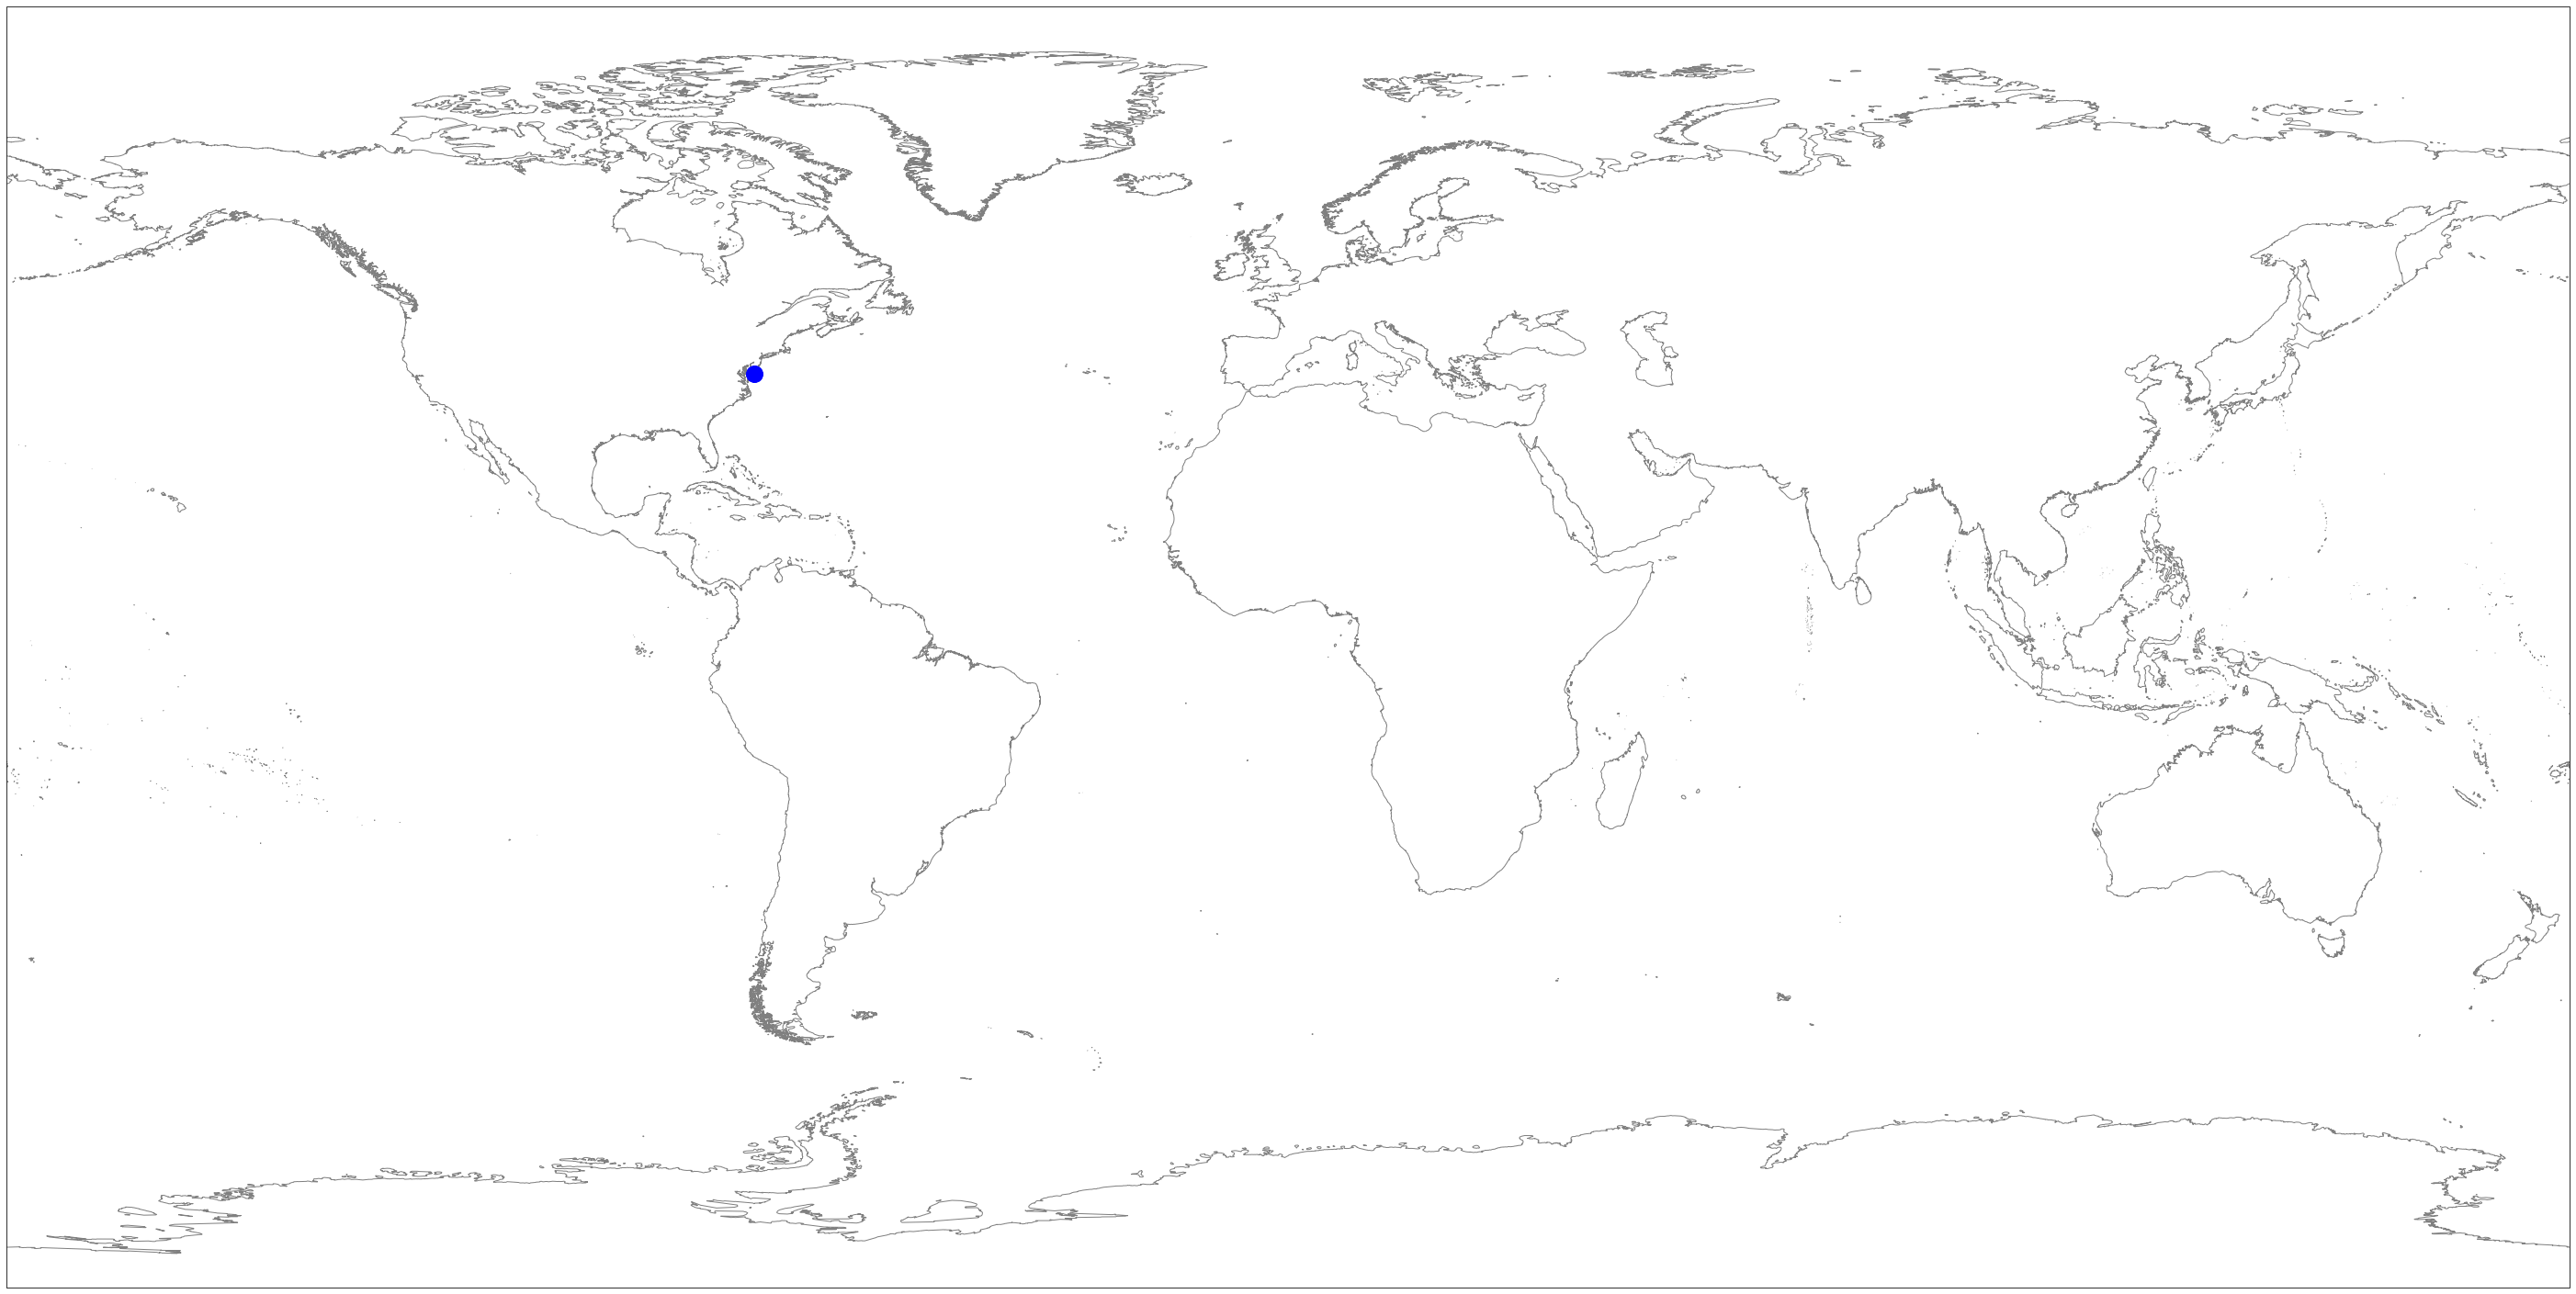

In [10]:
%matplotlib inline
fig = plt.figure(figsize=(50,30))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
ax.coastlines(resolution='10m', color='gray')
md_lon, md_lat = -75, 38.4
plt.plot(md_lon, md_lat,
         color='blue', linewidth=2, marker='o', markersize = 18.0)
ax.set_global()
plt.show()

# Plot using DLA

In [11]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from skimage import io

In [12]:
md_lon, md_lat = -75, 38.4
oc_lat, oc_lon = 38.409447, -75.059221
nBottles = 20
maxLon = 180.0
minLon = -180.0
maxLat = 90.0
minLat = -90.0

In [14]:
from global_land_mask import globe
#Check if our starting point is land (it shouldn't be)
print(globe.is_land(oc_lat, oc_lon))

True


In [32]:
allBottlesPaths = []
allPoints = []

for i in range(0,nBottles):
    
    # Start from Ocean City, Maryland
    x  = md_lon
    y  = md_lat
    bottlePoints = [[md_lat, md_lon]]
    bottlePathLat = [md_lat]
    bottlePathLon = [md_lon]

    while True:
        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        if r <= 0.25:
            x += 0.005
        if r > 0.25 and r <= 0.5:
            x -= 0.005
        if r > 0.5 and r <= 0.75:
            y += 0.005
        if r > 0.75:
            y -= 0.005
        
        #now apply periodic boundary conditions to Latitude and Longtidue (earth isn't flat!)
        #Add bottle's new location to tracker
            bottlePathLat += [y]
            bottlePathLon += [x]
            bottlePoints += [[y, x]]
        
        #Check if the new location is on land, and if so, bottle has landed!
        if (globe.is_land(y, x)):
            print("bottle landed")
            break
            
    allBottlesPaths += [[bottlePathLon, bottlePathLat]] 
    allPoints += [bottlePoints]

bottle landed
bottle landed
bottle landed
bottle landed
bottle landed
bottle landed
bottle landed
bottle landed
bottle landed
bottle landed
bottle landed
bottle landed
bottle landed
bottle landed
bottle landed
bottle landed
bottle landed
bottle landed
bottle landed
bottle landed


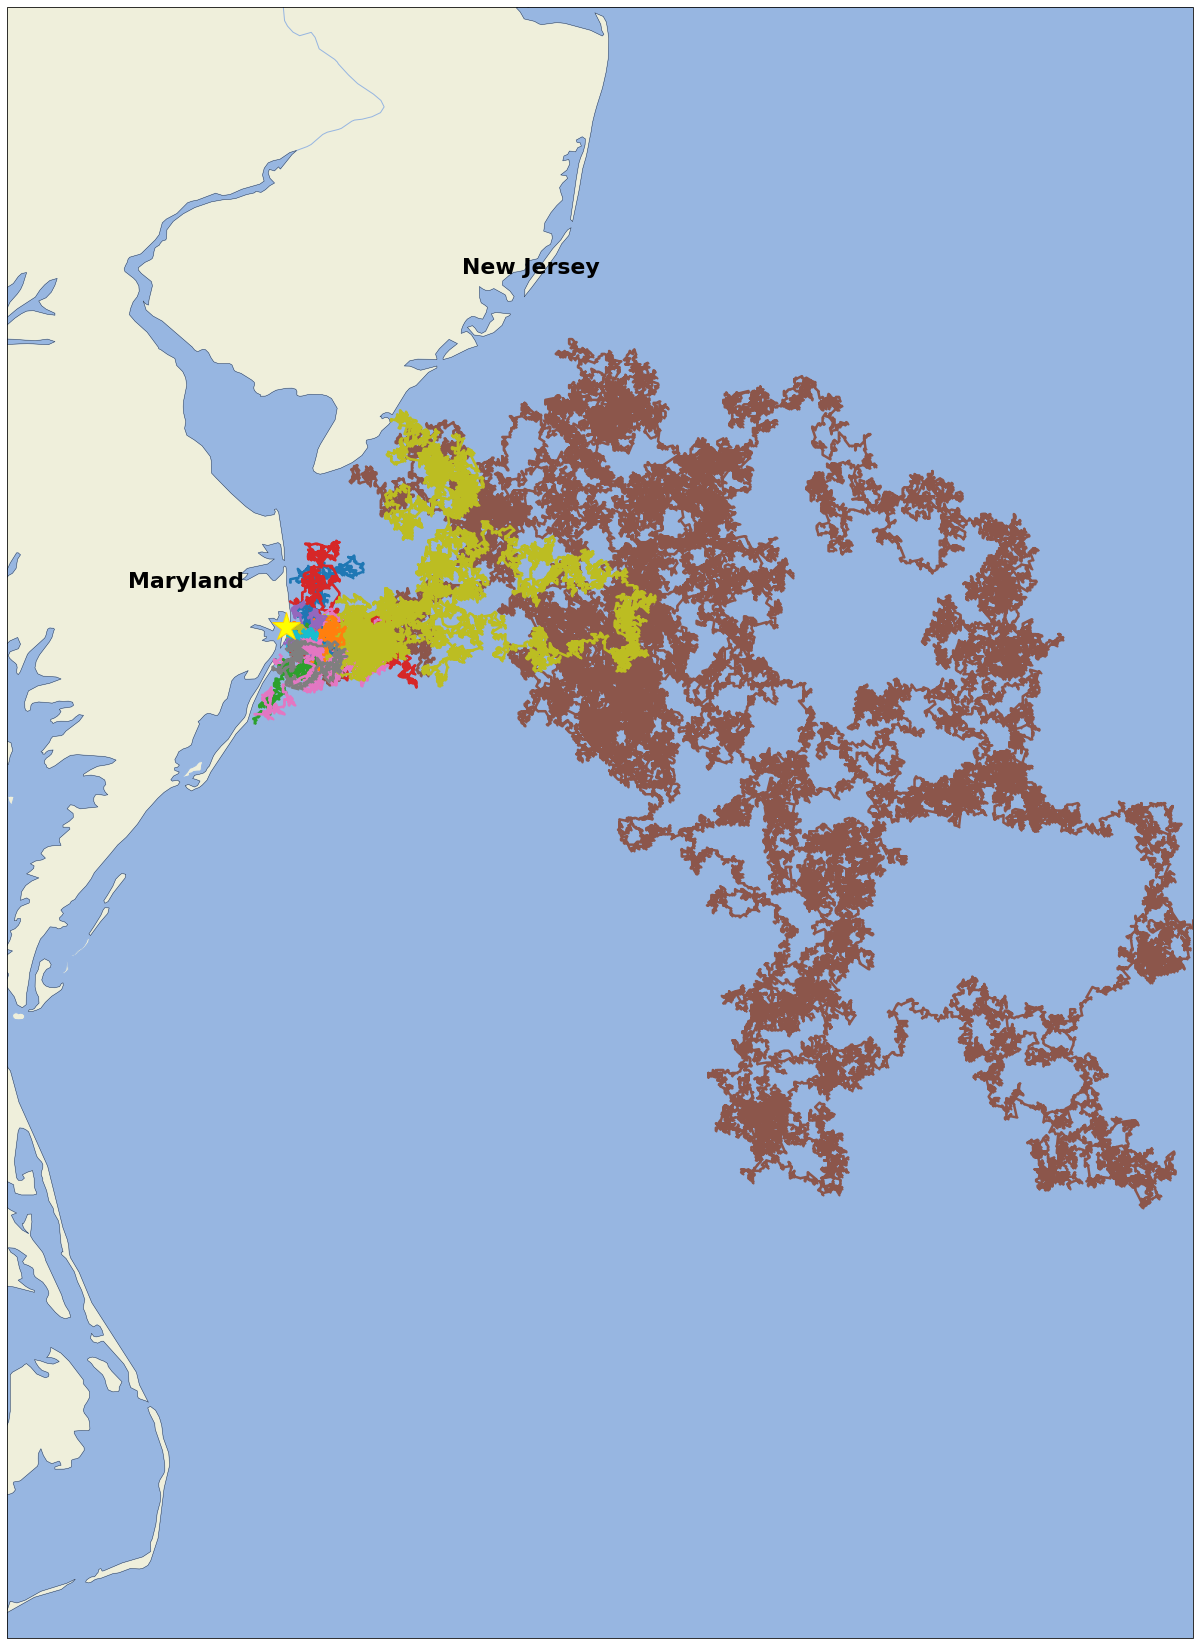

In [33]:
%matplotlib inline
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))

#Plot each bottle path
for i in range(len(allBottlesPaths)):
    plt.plot(allBottlesPaths[i][0], allBottlesPaths[i][1],
        linewidth=2.5, marker='o', markersize = 1.0)
    
#Show Ocean City, MD    
plt.plot(oc_lon, oc_lat,
         color='yellow', linewidth=2, marker='*', markersize = 30.0, markeredgecolor = "gold")

#Make it look more like a map
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE,linewidth=0.3)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':',linewidth=0.3)
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

#Label Map
ax.text(-75.2, 38.54, 'Maryland', color = "black",
            fontsize = 22, horizontalalignment='right',
            fontweight = "heavy",
            transform=ccrs.Geodetic())
ax.text(-74, 39.6, 'New Jersey', color = "black",
            fontsize = 22, horizontalalignment='right',
            fontweight = "heavy",
            transform=ccrs.Geodetic())
ax.set_extent([-76, -72, 35, 40.5])
plt.savefig("equal_20_4")
plt.show()

## Create Animation

In [38]:
%matplotlib osx
xs = [[i[1] for i in x] for x in allPoints]
ys = [[i[0] for i in x] for x in allPoints]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
#Make it look more like a map
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE,linewidth=0.3)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':',linewidth=0.3)
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)
#Label the Map
ax.text(-75.2, 38.54, 'Maryland', color = "black",
            fontsize = 14, horizontalalignment='right',
            fontweight = "heavy",
            transform=ccrs.Geodetic())
ax.text(-74.3, 39.6, 'New Jersey', color = "black",
            fontsize = 14, horizontalalignment='right',
            fontweight = "heavy",
            transform=ccrs.Geodetic())
ax.set_extent([-76, -71.7, 35.3, 40.5])

def animate(i):
    ax.plot(allBottlesPaths[i][0], allBottlesPaths[i][1],
        linewidth=2.5, marker='o', markersize = 1.0)

anim = FuncAnimation(fig, animate, interval=1500, frames=min([len(i) for i in xs]), repeat_delay = 2000)
f = r"animation2.gif" 
writergif = animation.PillowWriter(fps=1) 
anim.save(f, writer=writergif)

In [18]:
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def getImage(path):
    return OffsetImage(plt.imread(path, format="jpg"), zoom=.1)

# Produce gif of single bottle's path

# NOTE: animation cells produce an error related to the animation being written to a .gif, but still correctly generate an animation so please disregard. 

# Commenting out the bottom three lines of code will solve.

In [163]:
xs = [[i[1] for i in x] for x in [allPoints[2]]]
ys = [[i[0] for i in x] for x in [allPoints[2]]]
currXs= [xs[0][0]]
currYs = [ys[0][0]]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE,linewidth=0.3)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':',linewidth=0.3)
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.set_extent([-75.3, -74.6, 37.8, 38.5])

def animate(i):
    newX = xs[0][i]
    newY = ys[0][i]
    
    currXs.append(xs[0][i])
    currYs.append(ys[0][i])
     
    #Plot Bottle's Position
    for i in range(len(currXs)):
        ax.plot(currXs, currYs, color = "midnightblue", ls = ":")
        
    #Label Map
    ax.text(-75.2, 38.305877, 'Maryland', color = "black",
            fontsize = 14, horizontalalignment='right',
            transform=ccrs.Geodetic())
    
    #Plot location of Ocean City, MD starting point
    ax.plot(md_lon, md_lat,
         color='gold', linewidth=2, marker='*', markersize = 13.0, markeredgecolor = "black")

anim = FuncAnimation(fig, animate, interval=50)

#Comment out to remove error/not save animation file. 
f = r"single3.gif" 
writergif = animation.PillowWriter(fps=30) 
anim.save(f, writer=writergif)

KeyboardInterrupt: 

# Use bottle marker

In [ ]:
xs = [[i[1] for i in x] for x in [allPoints[2]]]
ys = [[i[0] for i in x] for x in [allPoints[2]]]
currXs= [xs[0][0]]
currYs = [ys[0][0]]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE,linewidth=0.3)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':',linewidth=0.3)
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.set_extent([-75.1, -74.86, 38.05, 38.6])

def animate(i):
    newX = xs[0][i]
    newY = ys[0][i]
    
    currXs.append(xs[0][i])
    currYs.append(ys[0][i])
     
    #Plot Bottle's Position
    for i in range(len(currXs)):
        ax.plot(currXs, currYs, color = "silver", ls = ":")
        
    #Add bottle icon to new point!
    path = "bottleicon.png"
    ab = AnnotationBbox(getImage(path), (newX, newY), frameon=False)
    ax.add_artist(ab)
    
    #Plot location of Ocean City, MD starting point
    ax.plot(md_lon, md_lat,
         color='gold', linewidth=2, marker='*', markersize = 13.0, markeredgecolor = "black")

anim = FuncAnimation(fig, animate, interval=200)
f = r"withBottle.gif" 
writergif = animation.PillowWriter(fps=30) 
anim.save(f, writer=writergif)
plt.show()

## Interactive map

In [ ]:
import os 
import folium

In [ ]:
m = folium.Map(location=[md_lat, md_lon], tiles = 'Stamen Terrain')
counter = 0
colors = ['beige', 'black', 'blue', 'cadetblue', 'darkblue', 'darkgreen', 'darkpurple', 'darkred', 'gray', 'green', 'lightblue', 'lightgray', 'lightgreen', 'lightred', 'orange', 'pink', 'purple', 'red', 'white']
for points in allPoints:
    folium.PolyLine(points, color=colors[counter%len(colors)], weight=2.5, opacity=1).add_to(m)
    counter += 1
m.save("bottles.html")
m

# Plot using more favorable currents

In [158]:
allBottlesPathsCA = []
allPointsCA = []
for i in range(0,nBottles):
    # Start from Ocean City, Maryland
    x  = md_lon
    y  = md_lat
    bottlePointsCA = [[md_lat, md_lon]]
    bottlePathLatCA = [md_lat]
    bottlePathLonCA = [md_lon]

    while True:
        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        if r <= 0.45:
            x += 0.005
        if r > 0.45 and r <= 0.48:
            x -= 0.005
        if r > 0.48 and r <= 0.75:
            y += 0.005
        if r > 0.9:
            y -= 0.005
        
        #now apply periodic boundary conditions to Latitude and Longtidue (earth isn't flat!)
        #Add bottle's new location to tracker
            bottlePathLatCA += [y]
            bottlePathLonCA += [x]
            bottlePointsCA += [[y, x]]
        
        #Check if the new location is on land, and if so, bottle has landed!
        if (globe.is_land(y, x)):
            break
            
    allBottlesPathsCA += [[bottlePathLonCA, bottlePathLatCA]] 
    allPointsCA += [bottlePoints2]

## Plot paths

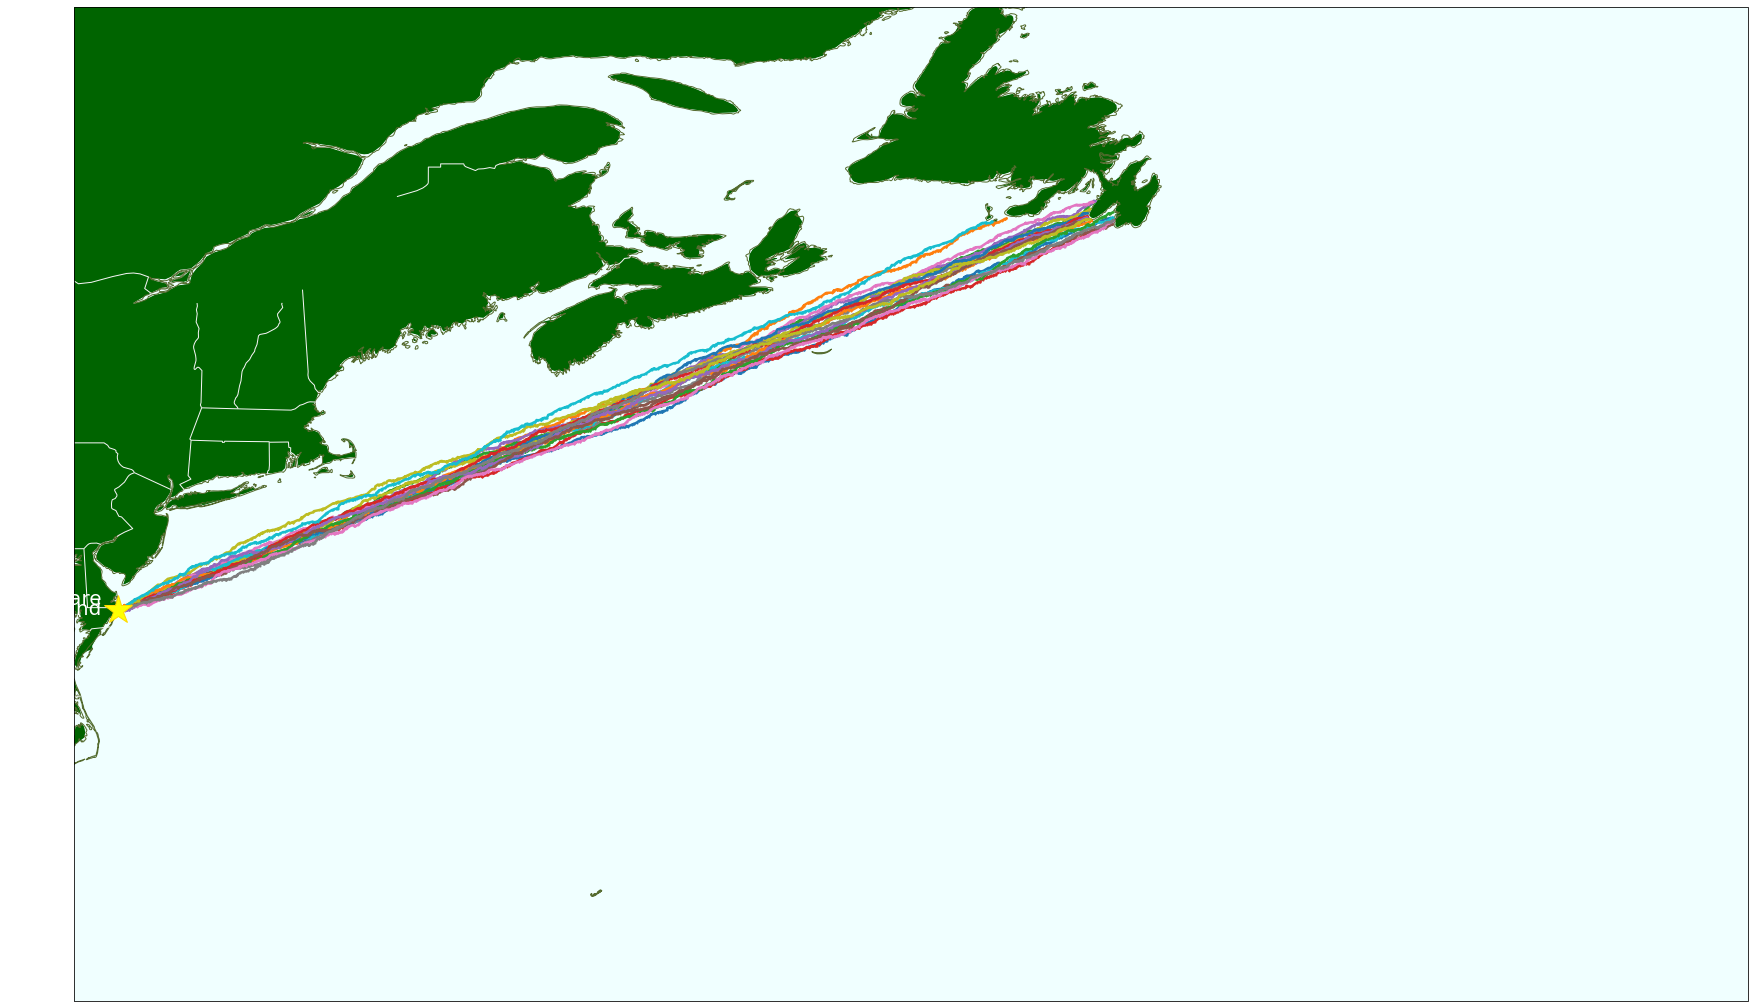

In [159]:
%matplotlib inline
fig = plt.figure(figsize=(30,30))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
md_lon, md_lat = -75, 38.4
oc_lat, oc_lon = 38.409447, -75.059221

for i in range(len(allBottlesPathsCA)):
    plt.plot(allBottlesPathsCA[i][0], allBottlesPathsCA[i][1],
        linewidth=2.5, marker='o', markersize = 1.0)
    
#Show Ocean City, MD    
plt.plot(oc_lon, oc_lat,
         color='yellow', linewidth=2, marker='*', markersize = 30.0, markeredgecolor = "gold")

#Make it look more like a map
ax.coastlines(resolution='10m', color='darkolivegreen')
ax.add_feature(cartopy.feature.LAND, color='darkgreen')
ax.add_feature(cartopy.feature.OCEAN, color='azure')
ax.add_feature(cartopy.feature.NaturalEarthFeature(
    'cultural', 'admin_1_states_provinces_lines', "50m",
    edgecolor='whitesmoke', facecolor='none'))

#Label Map
ax.text(-75.4, 38.305877, 'Maryland', color = "white",
            fontsize = 20, horizontalalignment='right',
            transform=ccrs.Geodetic())
ax.text(-75.4, 38.515877, 'Delaware', color = "white",
            fontsize = 20, horizontalalignment='right',
            transform=ccrs.Geodetic())


ax.set_extent([-76, -40, 30, 50])
plt.show()

### Animate currents that take us to Newfoundland

In [161]:
%matplotlib osx
xs = [[i[1] for i in x] for x in allPoints2]
ys = [[i[0] for i in x] for x in allPoints2]
currXs = [[xs[i][0]] for i in range(len(xs))]
currYs = [[ys[i][0]] for i in range(len(ys))]
max_len = max([len(i) for i in xs])

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
ax.coastlines(resolution='10m', color='darkolivegreen')
ax.add_feature(cartopy.feature.LAND, color='darkgreen')
ax.add_feature(cartopy.feature.OCEAN, color='azure')
ax.add_feature(cartopy.feature.NaturalEarthFeature(
    'cultural', 'admin_1_states_provinces_lines', "50m",
    edgecolor='whitesmoke', facecolor='none'))
ax.set_extent([-76, -40, 30, 50])

def animate(i):
    [currXs[j].append(xs[j][i]) for j in range(len(currXs)) if i < len(currXs[j])]
    [currXs[j].append(xs[j][-1]) for j in range(len(currXs)) if i >= len(currXs[j])]
    
    [currYs[j].append(ys[j][i]) for j in range(len(currYs)) if i < len(currYs[j])]
    [currYs[j].append(ys[j][-1]) for j in range(len(currYs)) if i >= len(currYs[j])]
     
    for j in range(len(currXs)):
        ax.plot(currXs[j], currYs[j])

anim = FuncAnimation(fig, animate, interval=10, frames = max_len)
plt.show()

KeyboardInterrupt: 

# Let's go to Ireland!!!

In [86]:
allBottlesPaths2 = []
allPoints2 = []

for i in range(0,nBottles):
    
    # Start from Ocean City, Maryland
    x  = md_lon
    y  = md_lat
    
    bottlePoints2 = [[md_lat, md_lon]]
    
    bottlePathLat2 = [md_lat]
    bottlePathLon2 = [md_lon]

    while True:

        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        if r <= 0.7:
            x += 0.005
        if r > 0.7 and r <= 0.73:
            x -= 0.005
        if r > 0.73 and r <= 0.945:
            y += 0.005
        if r > 0.945:
            y -= 0.005
        
        #now apply periodic boundary conditions to Latitude and Longtidue (earth isn't flat!)
            
        #Add bottle's new location to tracker
            bottlePathLat2 += [y]
            bottlePathLon2 += [x]
            
            bottlePoints2 += [[y, x]]
        
        #Check if the new location is on land, and if so, bottle has landed!
        if (globe.is_land(y, x)):
            break
            
    allBottlesPaths2 += [[bottlePathLon2, bottlePathLat2]] 
    allPoints2 += [bottlePoints2]

## Plot paths

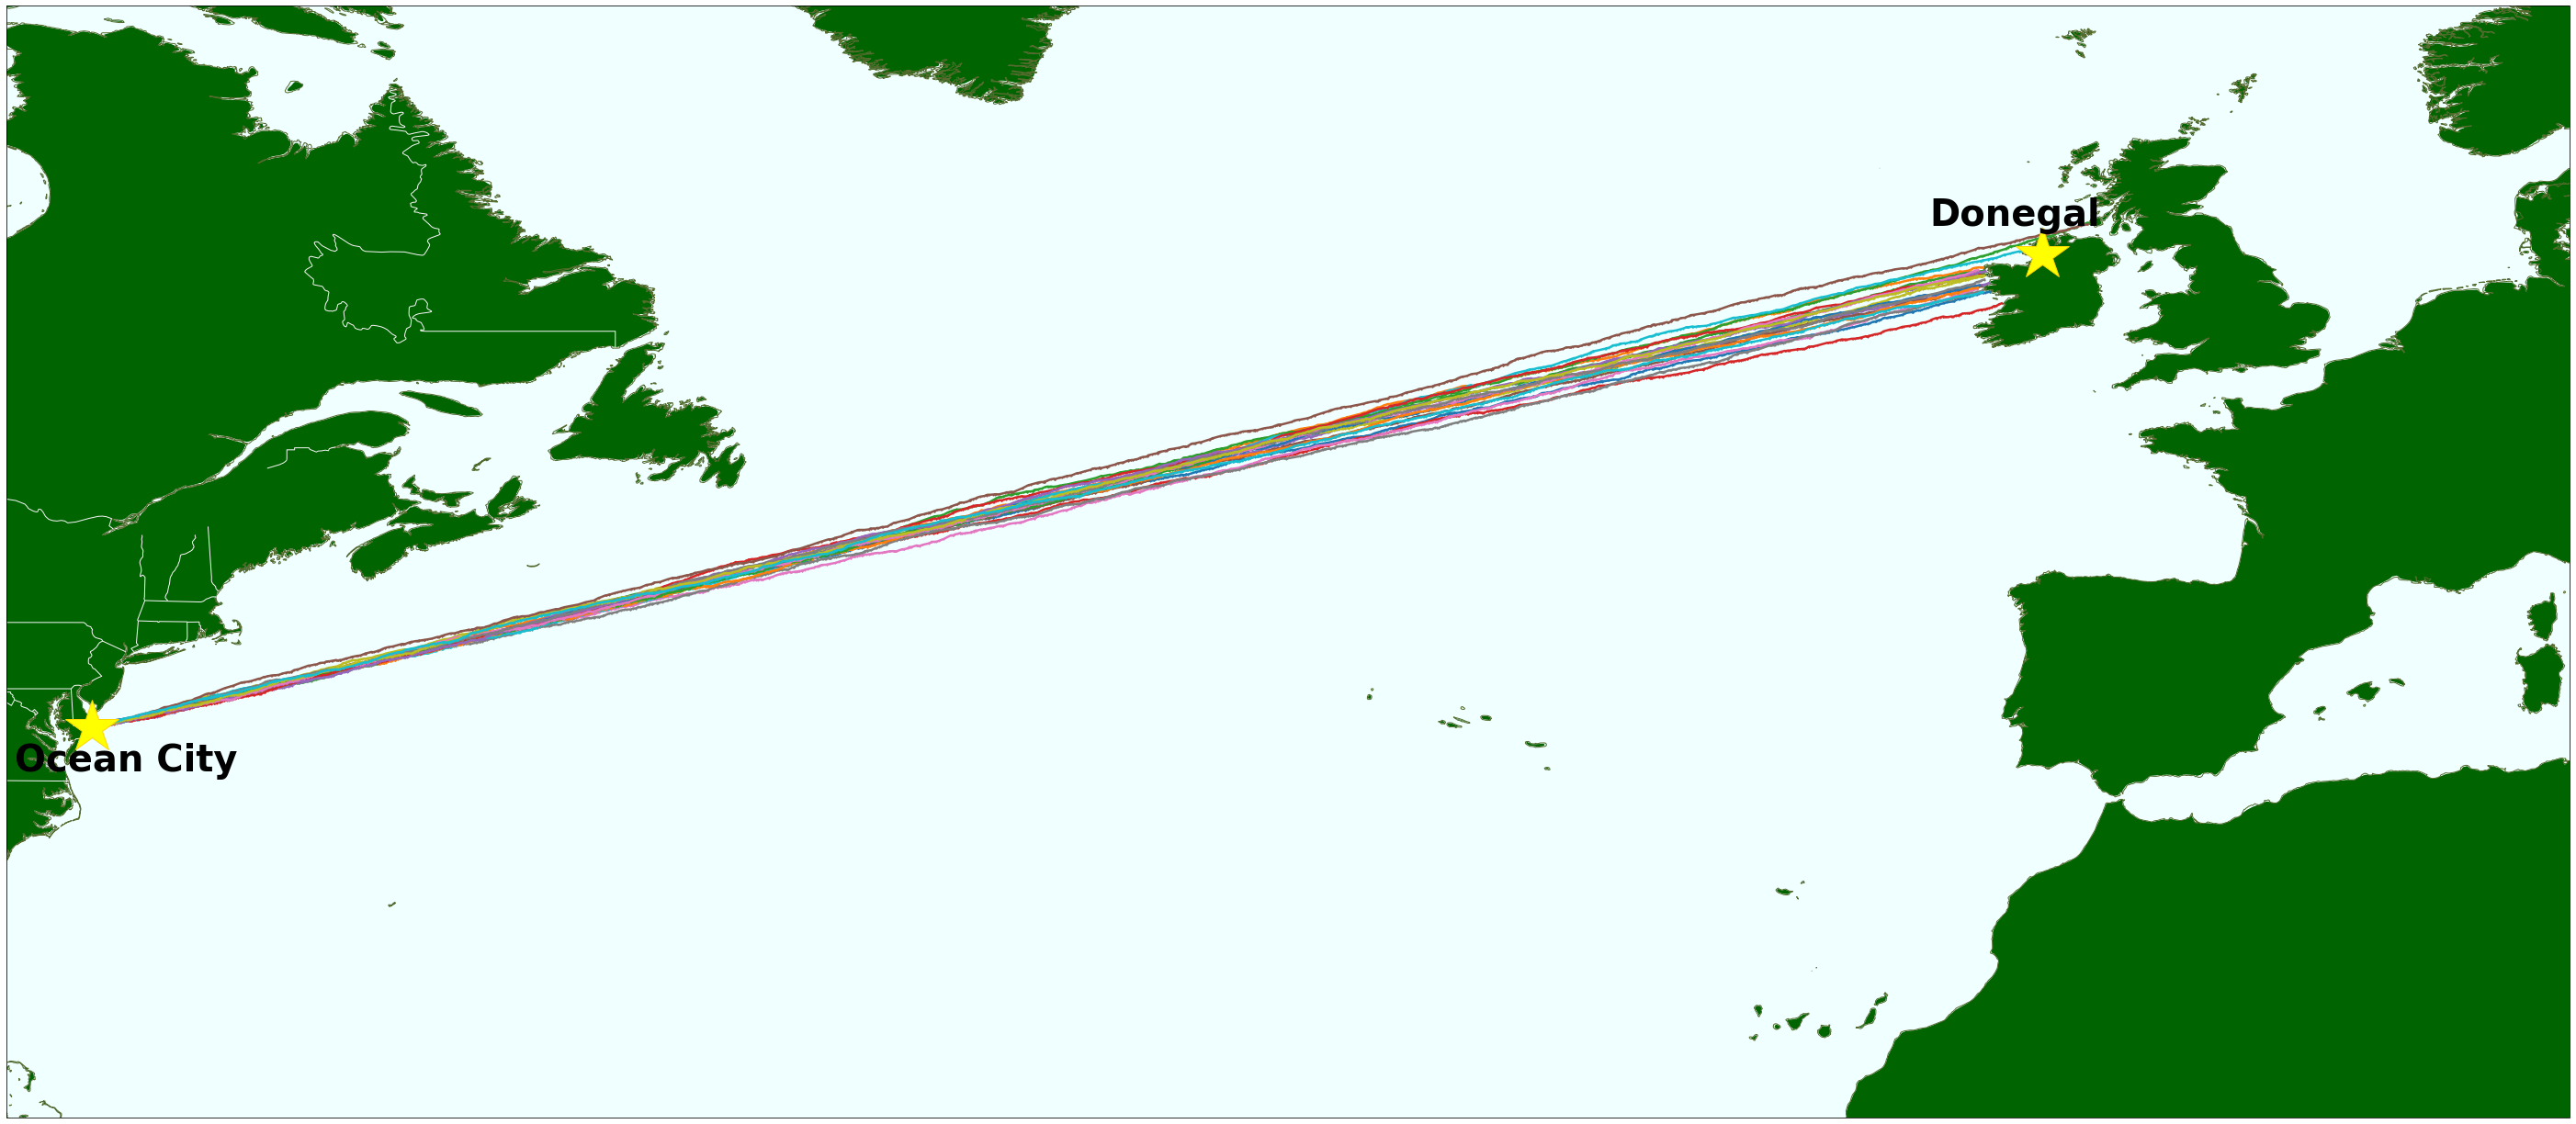

In [87]:
%matplotlib inline
fig = plt.figure(figsize=(50,50))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
ax.coastlines(resolution='10m', color='darkolivegreen')
md_lon, md_lat = -75, 38.4
oc_lat, oc_lon = 38.409447, -75.059221

for i in range(len(allBottlesPaths2)):
    plt.plot(allBottlesPaths2[i][0], allBottlesPaths2[i][1],
        linewidth=2.5, marker='o', markersize = 1.0)
    
#Show Ocean City, MD    
ax.plot(oc_lon, oc_lat,
         color='yellow', linewidth=2, marker='*', markersize = 60.0, markeredgecolor = "gold")

dn_lon, dn_lat = -8.109547, 54.653754
#Show Donegal
ax.plot(dn_lon, dn_lat,
         color='yellow', linewidth=2, marker='*', markersize = 60.0, markeredgecolor = "gold")

#Make it look more like a map
ax.add_feature(cartopy.feature.LAND, color='darkgreen')
ax.add_feature(cartopy.feature.OCEAN, color='azure')
ax.add_feature(cartopy.feature.NaturalEarthFeature(
    'cultural', 'admin_1_states_provinces_lines', "50m",
    edgecolor='whitesmoke', facecolor='none'))

#Label Map
ax.text(oc_lon + 5, oc_lat - 1.5, 'Ocean City', color = "black",
            fontsize = 40, horizontalalignment='right',
            fontweight = "semibold",
            transform=ccrs.Geodetic())
ax.text(dn_lon + 2, dn_lat + 1, 'Donegal', color = "black",
            fontsize = 40, horizontalalignment='right',
            fontweight = "semibold",
            transform=ccrs.Geodetic())


ax.set_extent([-78, 10, 25, 55])
plt.show()

## Animation

In [51]:
%matplotlib osx
xs = [[i[1] for i in x] for x in allPoints2]
ys = [[i[0] for i in x] for x in allPoints2]
currXs = [[xs[i][0]] for i in range(len(xs))]
currYs = [[ys[i][0]] for i in range(len(ys))]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
#Make it look more like a map
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE,linewidth=0.3)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':',linewidth=0.3)
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.set_extent([-78, 10, 25, 55])

#Show Ocean City, MD    
ax.plot(oc_lon, oc_lat,
         color='yellow', linewidth=2, marker='*', markersize = 10.0, markeredgecolor = "gold")

#Show Donegal
dn_lon, dn_lat = -8.109547, 54.653754
ax.plot(dn_lon, dn_lat,
         color='yellow', linewidth=2, marker='*', markersize = 10.0, markeredgecolor = "gold")

#Label Map
ax.text(oc_lon + 11, oc_lat - 2.5, 'Ocean City', color = "black",
            fontsize = 12, horizontalalignment='right',
            fontweight = "semibold",
            transform=ccrs.Geodetic())
ax.text(dn_lon + 2, dn_lat + 1, 'Donegal', color = "black",
            fontsize = 12, horizontalalignment='right',
            fontweight = "semibold",
            transform=ccrs.Geodetic())

def animate(i):
    ax.plot(allBottlesPaths2[i][0], allBottlesPaths2[i][1],
        linewidth=2.5, marker='o', markersize = 1.0)

anim = FuncAnimation(fig, animate, interval=500, frames=min([len(i) for i in xs]), repeat_delay = 100)
f = r"donegal.gif" 
writergif = animation.PillowWriter(fps=5) 
anim.save(f, writer=writergif)

IndexError: list index out of range

# Chaotic: 60 bottles!

## Generate paths

In [34]:
allBottlesPaths3 = []
allPoints3 = []

for i in range(0,nBottles * 3):
    
    # Start from Ocean City, Maryland
    x  = md_lon
    y  = md_lat
    
    bottlePoints3 = [[md_lat, md_lon]]
    bottlePathLat3 = [md_lat]
    bottlePathLon3 = [md_lon]

    while True:

        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        if r <= 0.6:
            x += 0.005
        if r > 0.6 and r <= 0.65:
            x -= 0.005
        if r > 0.65 and r <= 0.853:
            y += 0.01
        if r > 0.853:
            y -= 0.01
        
        #now apply periodic boundary conditions to Latitude and Longtidue (earth isn't flat!)
        
        #Add bottle's new location to tracker
            bottlePathLat3 += [y]
            bottlePathLon3 += [x]
            
            bottlePoints3 += [[y, x]]
        
        #Check if the new location is on land, and if so, bottle has landed!
        if (globe.is_land(y, x)):
            break
            
    allBottlesPaths3 += [[bottlePathLon3, bottlePathLat3]] 
    allPoints3 += [bottlePoints3]

## Plot lines

In [ ]:
%matplotlib inline
fig = plt.figure(figsize=(50,50))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
# ax.coastlines(resolution='10m', color='darkolivegreen')
md_lon, md_lat = -75, 38.4
oc_lat, oc_lon = 38.409447, -75.059221

for i in range(len(allBottlesPaths3)):
    plt.plot(allBottlesPaths3[i][0], allBottlesPaths3[i][1],
        linewidth=2.5, marker='o', markersize = 1.0)
    
#Show Ocean City, MD    
ax.plot(oc_lon, oc_lat,
         color='yellow', linewidth=2, marker='*', markersize = 60.0, markeredgecolor = "gold")

#Show Donegal
dn_lon, dn_lat = -8.109547, 54.653754
ax.plot(dn_lon, dn_lat,
         color='yellow', linewidth=2, marker='*', markersize = 60.0, markeredgecolor = "gold")

#Make it look more like a map
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE,linewidth=0.3)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':',linewidth=0.3)
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

#Label Map
ax.text(oc_lon + 5, oc_lat - 1.5, 'Ocean City', color = "white",
            fontsize = 40, horizontalalignment='right',
            fontweight = "semibold",
            transform=ccrs.Geodetic())
ax.text(dn_lon + 2, dn_lat + 1, 'Donegal', color = "white",
            fontsize = 40, horizontalalignment='right',
            fontweight = "semibold",
            transform=ccrs.Geodetic())


ax.set_extent([-78, 10, 25, 55])
plt.show()

## Create animation

In [42]:
%matplotlib osx
xs = [[i[1] for i in x] for x in allPoints3]
ys = [[i[0] for i in x] for x in allPoints3]
currXs = [[xs[i][0]] for i in range(len(xs))]
currYs = [[ys[i][0]] for i in range(len(ys))]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
#Make it look more like a map
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE,linewidth=0.3)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':',linewidth=0.3)
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.set_extent([-78, 10, 25, 55])

#Show Ocean City, MD    
ax.plot(oc_lon, oc_lat,
         color='yellow', linewidth=2, marker='*', markersize = 10.0, markeredgecolor = "gold")

#Show Donegal
dn_lon, dn_lat = -8.109547, 54.653754
ax.plot(dn_lon, dn_lat,
         color='yellow', linewidth=2, marker='*', markersize = 10.0, markeredgecolor = "gold")

#Label Map
ax.text(oc_lon + 5, oc_lat - 1.5, 'Ocean City', color = "white",
            fontsize = 14, horizontalalignment='right',
            fontweight = "semibold",
            transform=ccrs.Geodetic())
ax.text(dn_lon + 2, dn_lat + 1, 'Donegal', color = "white",
            fontsize = 14, horizontalalignment='right',
            fontweight = "semibold",
            transform=ccrs.Geodetic())

def animate(i):
    ax.plot(allBottlesPaths3[i][0], allBottlesPaths3[i][1],
        linewidth=2.5, marker='o', markersize = 1.0)

anim = FuncAnimation(fig, animate, interval=10, frames=min([len(i) for i in xs]))
f = r"donegal60.gif" 
writergif = animation.PillowWriter(fps=40) 
anim.save(f, writer=writergif)

IndexError: list index out of range

# More complex currents!

## Idea: different behavior according to different currents (Gulf Stream + N. Atlantic Drift)

In [156]:
allBottlesPaths4 = []
allPoints4 = []
for i in range(0,nBottles):
    
    # Start from Ocean City, Maryland
    x  = md_lon
    y  = md_lat
    bottlePoints4 = [[md_lat, md_lon]]
    bottlePathLat4 = [md_lat]
    bottlePathLon4 = [md_lon]
    onLand = False
    
    #Approximating Gulf Stream: about 60 degrees
    while x < -60:
        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        if r <= 0.05:
            x -= 0.005
        if r > 0.05 and r <= 0.1:
            y -= 0.005
        if r > 0.1 and r <= 0.72:
            x += 0.005
        if r > 0.72:
            y += 0.005
        
        #Add bottle's new location to tracker
            bottlePathLat4 += [y]
            bottlePathLon4 += [x]
            bottlePoints4 += [[y, x]]
        
        #Check if the new location is on land, and if so, bottle has landed!
        if (globe.is_land(y, x)):
            onLand = True
            break
        
    if onLand:
        continue
        
    #Approx N. Atlantic Drif: 15 degrees 
    while True:
        r = np.random.random(); # Random float:  0.0 <= r < 1.0
        #based on the value of 'r', move the particle
        #left, right, up, or down and change x and y accordingly
        if r <= 0.05:
            x -= 0.005                
        if r > 0.05 and r <= 0.1:
            y -= 0.005
        if r > 0.1 and r <= 0.82:
            x += 0.005
        if r > 0.82:
            y += 0.005

        #now apply periodic boundary conditions to Latitude and Longtidue (earth isn't flat!)

        #Add bottle's new location to tracker
        bottlePathLat4 += [y]
        bottlePathLon4 += [x]
        bottlePoints4 += [[y, x]]

                #Check if the new location is on land, and if so, bottle has landed!
        if (globe.is_land(y, x)):
            break
            
    allBottlesPaths4 += [[bottlePathLon4, bottlePathLat4]] 
    allPoints4 += [bottlePoints4]

In [157]:
%matplotlib inline
fig = plt.figure(figsize=(50,50))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
# ax.coastlines(resolution='10m', color='darkolivegreen')
md_lon, md_lat = -75, 38.4
oc_lat, oc_lon = 38.409447, -75.059221

for i in range(len(allBottlesPaths4)):
    plt.plot(allBottlesPaths4[i][0], allBottlesPaths4[i][1],
        linewidth=2.5, marker='o', markersize = 1.0)
    
#Show Ocean City, MD    
ax.plot(oc_lon, oc_lat,
         color='yellow', linewidth=2, marker='*', markersize = 60.0, markeredgecolor = "gold")

#Show Donegal
dn_lon, dn_lat = -8.109547, 54.653754
ax.plot(dn_lon, dn_lat,
         color='yellow', linewidth=2, marker='*', markersize = 60.0, markeredgecolor = "gold")

#Make it look more like a map
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE,linewidth=0.3)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':',linewidth=0.3)
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)

#Label Map
ax.text(oc_lon + 5, oc_lat - 1.5, 'Ocean City', color = "white",
            fontsize = 40, horizontalalignment='right',
            fontweight = "semibold",
            transform=ccrs.Geodetic())
ax.text(dn_lon + 2, dn_lat + 1, 'Donegal', color = "white",
            fontsize = 40, horizontalalignment='right',
            fontweight = "semibold",
            transform=ccrs.Geodetic())


ax.set_extent([-78, 10, 25, 55])
plt.show()

In [153]:
%matplotlib osx
xs = [[i[1] for i in x] for x in allPoints4]
ys = [[i[0] for i in x] for x in allPoints4]

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
#Make it look more like a map
ax.add_feature(cartopy.feature.LAND)
ax.add_feature(cartopy.feature.OCEAN)
ax.add_feature(cartopy.feature.COASTLINE,linewidth=0.3)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':',linewidth=0.3)
ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
ax.add_feature(cartopy.feature.RIVERS)
ax.set_extent([-78, 10, 25, 55])
#Show Ocean City, MD    
ax.plot(oc_lon, oc_lat,
         color='yellow', linewidth=2, marker='*', markersize = 10.0, markeredgecolor = "gold")
#Show Donegal
dn_lon, dn_lat = -8.109547, 54.653754
ax.plot(dn_lon, dn_lat,
         color='yellow', linewidth=2, marker='*', markersize = 10.0, markeredgecolor = "gold")
#Label Map
ax.text(oc_lon + 11, oc_lat - 2.5, 'Ocean City', color = "black",
            fontsize = 12, horizontalalignment='right',
            fontweight = "semibold",
            transform=ccrs.Geodetic())
ax.text(dn_lon + 2, dn_lat + 1, 'Donegal', color = "black",
            fontsize = 12, horizontalalignment='right',
            fontweight = "semibold",
            transform=ccrs.Geodetic())

def animate(i):
    ax.plot(allBottlesPaths4[i][0], allBottlesPaths4[i][1],
        linewidth=2.5, marker='o', markersize = 1.0)

anim = FuncAnimation(fig, animate, interval=1500, frames=min([len(i) for i in xs]), repeat_delay = 2000)
f = r"donegalAdvanced.gif" 
writergif = animation.PillowWriter(fps=1) 
anim.save(f, writer=writergif)

IndexError: list index out of range